In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
file_name ={'orders':'olist_orders_dataset',
            'order_items':'olist_order_items_dataset',
            'products':'olist_products_dataset',
            'eng_product_cate':'product_category_name_translation',
            'customers': 'olist_customers_dataset',
            'sellers': 'olist_sellers_dataset',
            'payments':'olist_order_payments_dataset',
            'reviews':'olist_order_reviews_dataset',
            'geolocation':'olist_geolocation_dataset'}
for name in file_name.keys(): locals()[name] = pd.read_csv('./Datasets/'+file_name[name]+'.csv')
dataset_name = file_name.keys()
df_columns_name = pd.DataFrame([globals()[i].columns for i in dataset_name], index = dataset_name).T
df_columns_name

,orders,order_items,products,eng_product_cate,customers,sellers,payments,reviews,geolocation
0,order_id,order_id,product_id,product_category_name,customer_id,seller_id,order_id,review_id,geolocation_zip_code_prefix
1,customer_id,order_item_id,product_category_name,product_category_name_english,customer_unique_id,seller_zip_code_prefix,payment_sequential,order_id,geolocation_lat
2,order_status,product_id,product_name_lenght,None,customer_zip_code_prefix,seller_city,payment_type,review_score,geolocation_lng
3,order_purchase_timestamp,seller_id,product_description_lenght,None,customer_city,seller_state,payment_installments,review_comment_title,geolocation_city
4,order_approved_at,shipping_limit_date,product_photos_qty,None,customer_state,None,payment_value,review_comment_message,geolocation_state
5,order_delivered_carrier_date,price,product_weight_g,None,None,None,None,review_creation_date,None
6,order_delivered_customer_date,freight_value,product_length_cm,None,None,None,None,review_answer_timestamp,None
7,order_estimated_delivery_date,None,product_height_cm,None,None,None,None,None,None
8,None,None,product_width_cm,None,None,None,None,None,None


In [10]:
retail = orders.merge(order_items, on='order_id')\
        .merge(products, on='product_id')\
        .merge(eng_product_cate, on='product_category_name')\
        .merge(customers, on='customer_id')\
        .merge(sellers, on='seller_id').merge(payments, on='order_id')\
        .merge(reviews, on='order_id').merge(geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
        # .merge(geolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')

In [27]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [12]:
retail.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149,-23.574809,-46.587471,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149,-23.575033,-46.587451,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149,-23.580054,-46.586673,sao paulo,SP


In [13]:
retail.shape

(17658865, 45)

In [14]:
missing_values = retail.isnull().sum(axis=0)/len(retail)*100

In [15]:
missing_values.sort_values(ascending= False)

review_comment_title             88.645793
review_comment_message           58.790851
order_delivered_customer_date     1.948047
order_delivered_carrier_date      1.040288
order_approved_at                 0.015998
product_height_cm                 0.000612
product_length_cm                 0.000612
product_width_cm                  0.000612
product_weight_g                  0.000612
order_purchase_timestamp          0.000000
order_status                      0.000000
order_id                          0.000000
customer_id                       0.000000
price                             0.000000
shipping_limit_date               0.000000
seller_id                         0.000000
product_id                        0.000000
order_item_id                     0.000000
order_estimated_delivery_date     0.000000
product_description_lenght        0.000000
product_name_lenght               0.000000
product_photos_qty                0.000000
product_category_name_english     0.000000
customer_un

In [16]:
retail.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)
retail.shape

(17311915, 45)

In [17]:
retail.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
product_category_name_english     object
customer_unique_id                object
customer_zip_cod

In [18]:
retail.describe().loc[['mean', 'min', '25%', '50%', '75%', 'max']]

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
mean,1.205207,120.655809,19.604258,48.69684,777.914689,2.193787,2147.788411,30.497497,16.688128,23.175499,32736.314072,25177.766529,1.089382,2.937659,173.659119,4.078727,32736.314072,-21.975546,-45.953990
min,1.000000,0.850000,0.000000,5.00000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000,1.000000,0.000000,0.000000,1.000000,1003.000000,-36.605374,-101.466766
25%,1.000000,39.900000,13.470000,42.00000,341.000000,1.000000,300.000000,18.000000,8.000000,15.000000,13140.000000,6766.000000,1.000000,1.000000,61.690000,4.000000,13140.000000,-23.577815,-47.636786
50%,1.000000,74.900000,16.260000,51.00000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,23970.000000,13930.000000,1.000000,1.000000,109.620000,5.000000,23970.000000,-22.910501,-46.461816
75%,1.000000,135.000000,20.370000,57.00000,975.000000,3.000000,1825.000000,39.000000,20.000000,30.000000,38400.000000,30315.000000,1.000000,4.000000,191.460000,5.000000,38400.000000,-20.435195,-43.352097
max,21.000000,6735.000000,409.680000,76.00000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99980.000000,99730.000000,26.000000,24.000000,13664.080000,5.000000,99980.000000,43.684961,13.820214


### A. Show the correlation of the features in Retail dataset and share your insights.

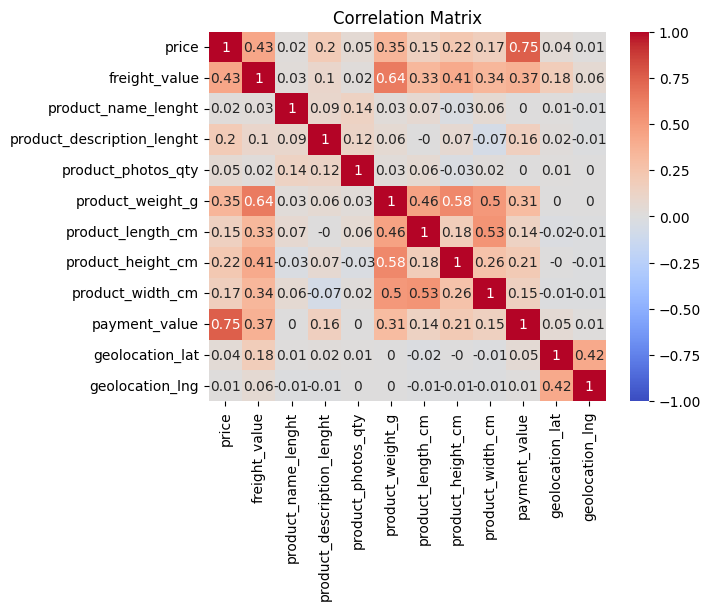

In [19]:
retail_numerical = retail.select_dtypes(include=['float64'])
corr = np.round(retail_numerical.corr(), 2)
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## B. Show the customer_state and count of Customer_city in state as single output and visualize the same.

In [20]:
cnt_cust_city = retail.groupby('customer_state')['customer_city'].nunique().reset_index()
cnt_cust_city = cnt_cust_city.rename(columns={'customer_city': 'customer_city_count'})
cnt_cust_city = cnt_cust_city.sort_values(by='customer_city_count', ascending = False)
cnt_cust_city

,customer_state,customer_city_count
10,MG,729
25,SP,622
22,RS,368
17,PR,352
4,BA,348
23,SC,237
8,GO,173
5,CE,159
15,PE,150
18,RJ,137


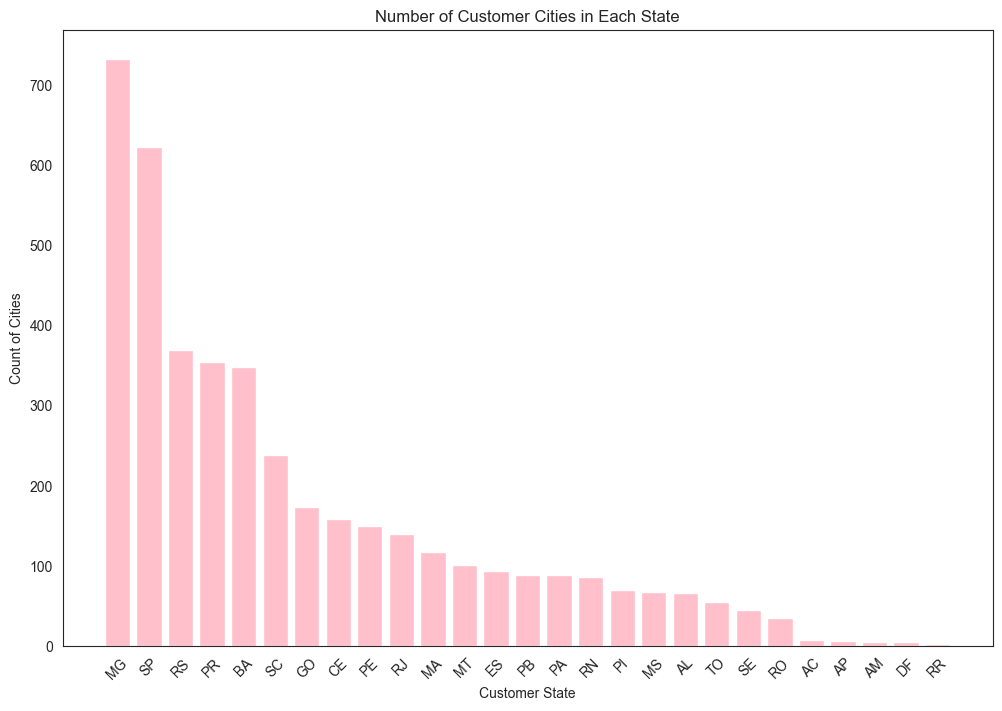

In [41]:
plt.figure(figsize=(12, 8))
plt.bar(cnt_cust_city['customer_state'], cnt_cust_city['customer_city_count'], color = "Pink")
plt.xticks(rotation=45)


plt.xlabel('Customer State')
plt.ylabel('Count of Cities')
plt.title('Number of Customer Cities in Each State')

plt.show()

## C. Print top 10 categories Sold and visualize the same.

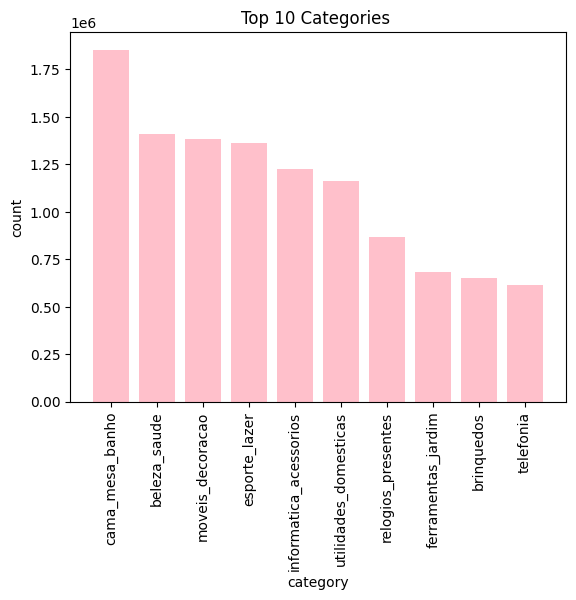

In [21]:
result = retail.groupby('product_category_name')['order_id'].count().reset_index().sort_values('order_id', ascending=False).head(10)
plt.bar(result['product_category_name'], result['order_id'], color = 'Pink')
plt.xticks(rotation=90)
plt.xlabel('category')
plt.ylabel('count')
plt.title('Top 10 Categories ')
plt.show()

## D. Find top 10 longest deliveries

In [24]:
retail.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
product_category_name_english     object
customer_unique_id                object
customer_zip_cod

In [32]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [38]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

top_10_longest_delivery = orders.sort_values(by='delivery_time', ascending=False).head(10)

print(top_10_longest_delivery[['order_id', 'delivery_time']])


                               order_id  delivery_time
19590  ca07593549f1816d26a572e06dc1eab6          209.0
55619  1b3190b2dfa9d789e1f14c05b647a14a          208.0
61610  440d0d17af552815d15a9e41abe49359          195.0
70307  2fb597c2f772eca01b1f5c561bf6cc7b          194.0
38509  0f4519c5f1c541ddec9f21b3bddd533a          194.0
89130  285ab9426d6982034523a855f55a885e          194.0
11399  47b40429ed8cce3aee9199792275433f          191.0
81401  2fe324febf907e3ea3f2aa9650869fa5          189.0
54480  2d7561026d542c8dbd8f0daeadf67a43          188.0
68769  c27815f7e3dd0b926b58552628481575          187.0


In [39]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [43]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [51]:
longest_delivery_productid = pd.merge(top_10_longest_delivery, order_items, on='order_id')
longest_delivery_productname = pd.merge(longest_delivery_productid, products, on='product_id')
longest_delivery_productname_changed = pd.merge(longest_delivery_productname, eng_product_cate, on='product_category_name' )

In [54]:
longest_delivery_productname_changed = longest_delivery_productname_changed[['order_id', 'delivery_time', 'product_id', 'product_category_name', 'product_name_lenght','product_category_name_english']]
print(longest_delivery_productname_changed)


                           order_id  delivery_time  \
0  ca07593549f1816d26a572e06dc1eab6          209.0   
1  1b3190b2dfa9d789e1f14c05b647a14a          208.0   
2  440d0d17af552815d15a9e41abe49359          195.0   
3  2fb597c2f772eca01b1f5c561bf6cc7b          194.0   
4  0f4519c5f1c541ddec9f21b3bddd533a          194.0   
5  285ab9426d6982034523a855f55a885e          194.0   
6  47b40429ed8cce3aee9199792275433f          191.0   
7  2fe324febf907e3ea3f2aa9650869fa5          189.0   
8  2d7561026d542c8dbd8f0daeadf67a43          188.0   
9  c27815f7e3dd0b926b58552628481575          187.0   

                         product_id  product_category_name  \
0  8eed5d27f5b8c6248731efb4782f6141             automotivo   
1  ee406bf28024d97771c4b1e8b7e8e219             cool_stuff   
2  3bec03860f3782ef8993056e01b8229a         consoles_games   
3  8ed094bfe076c568f6bb10feada3f75d      moveis_escritorio   
4  e0d64dcfaa3b6db5c54ca298ae101d05     relogios_presentes   
5  0c6fc9b9317a68d1cda098c063914b

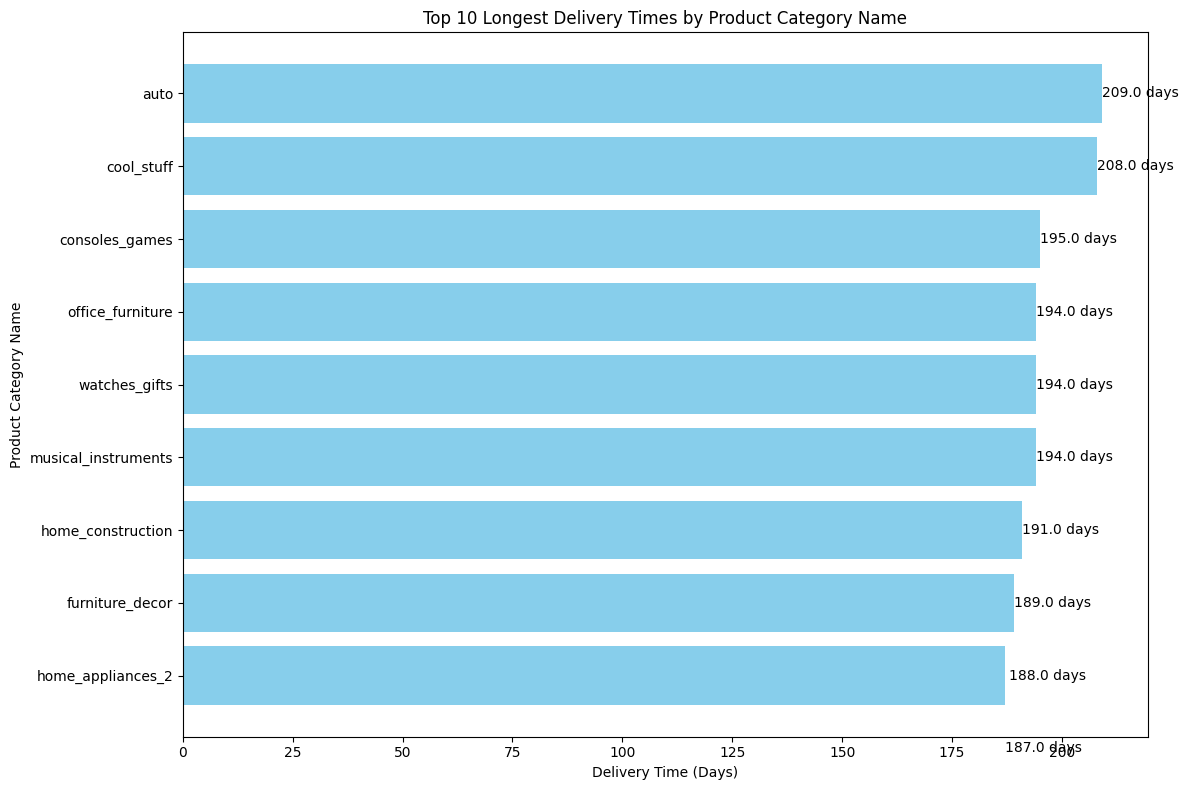

In [55]:
plt.figure(figsize=(12, 8))
plt.barh(longest_delivery_productname_changed['product_category_name_english'], longest_delivery_productname_changed['delivery_time'], color='skyblue')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Product Category Name')
plt.title('Top 10 Longest Delivery Times by Product Category Name')
plt.gca().invert_yaxis()  

for index, value in enumerate(longest_delivery_productname_changed['delivery_time']):
    plt.text(value, index, f'{value} days', va='center')

plt.tight_layout()
plt.show()